In [ ]:
# !pip install requests
# !pip install tabulate
# !pip install future

# # # Required for plotting:
# # !pip install matplotlib

In [ ]:
# !pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


In [ ]:
# # !pip3 uninstall numpy
# # !pip3 install numpy --upgrade --user 
# # !pip install numpy==1.22 --user
# # !pip install lightgbm
# !pip install tensorflow

In [4]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import h2o
from h2o.automl import H2OAutoML
import math
import pickle


In [5]:
# !pip install --upgrade lightgbm

In [6]:
# # Don't know why but I need to run the below code "twice".

# import h2o

# import locale
# locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# # h2o.init(encoding= "ISO-8859-1")  # You can replace "ISO-8859-1" with the appropriate encoding for your data

# h2o.init()
# # h2o.demo("glm")

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

import os
import gc
os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask
working_directory = 'D:\\OneDrive - 한동대학교\\PROJECT\\트머프로젝트\\'  ## 서로 다른 환경에서는 이곳을 수정해야 함.
# working_directory = 'C:\\Users\\user\\OneDrive - 한동대학교\\PROJECT\\트머프로젝트\\'

os.chdir(working_directory)
gc.collect()


85

In [8]:
# RMSPE 계산 함수
def rmspe(y_true, y_pred):
    return  np.sqrt(np.mean(np.square((y_true - y_pred) / (y_true))))

# Updated dataset

In [9]:

import gc
import os
working_directory = 'D:\\OneDrive - 한동대학교\\PROJECT\\트머프로젝트\\'  ## 서로 다른 환경에서는 이곳을 수정해야 함.
# working_directory = 'C:\\Users\\user\\OneDrive - 한동대학교\\PROJECT\\트머프로젝트\\'

os.chdir(working_directory)
gc.collect()

# load dataset
coin = 'BTC'
target_var = 'dv5_realized_volatility_mean0'
target_var_3 = target_var[:3]

# df3 = pd.read_csv("./output/{}_sum_plus_nn_features_for_{}.csv".format(coin, target_var_3))
# df_2 = pd.read_parquet('/content/drive/MyDrive/트머프/my.parquet')

df3 = pd.read_csv("./output/temp_1105_first_30000.csv")



In [10]:
pd.set_option('display.max_columns', None)
print(df3.shape)
print(type(df3))
df3.head(3)

(8411, 9051)
<class 'pandas.core.frame.DataFrame'>


,realized_volatility_mean0,num_trades,lowest_return,highest_return,high_low_gap,trade_vol,time_id,BB_width_w20,BB_width_w40,BB_width_w10,dv5_realized_volatility_mean0,dv2_lowest_return,dv3_highest_return,realized_volatility_mean0_150,num_trades_150,lowest_return_150,highest_return_150,high_low_gap_150,trade_vol_150,realized_volatility_mean0_300,num_trades_300,lowest_return_300,highest_return_300,high_low_gap_300,trade_vol_300,realized_volatility_mean0_450,num_trades_450,lowest_return_450,highest_return_450,high_low_gap_450,trade_vol_450,liq_last_1,liq_last_2,liq_last_5,liq_last_10,liq_last_15,ep_liq_1,ep_liq_2,ep_liq_5,ep_liq_10,ep_liq_15,bidask_spread_0,bidask_spread_1,liq_last_1_150,liq_last_2_150,liq_last_5_150,liq_last_10_150,liq_last_15_150,ep_liq_1_150,ep_liq_2_150,ep_liq_5_150,ep_liq_10_150,ep_liq_15_150,bidask_spread_0_150,bidask_spread_1_150,liq_last_1_300,liq_last_2_300,liq_last_5_300,liq_last_10_300,liq_last_15_300,ep_liq_1_300,ep_liq_2_300,ep_liq_5_300,ep_liq_10_300,ep_liq_15_300,bidask_spread_0_300,bidask_spread_1_300,liq_last_1_450,liq_last_2_450,liq_last_5_450,liq_last_10_450,liq_last_15_450,ep_liq_1_450,ep_liq_2_450,ep_liq_5_450,ep_liq_10_450,ep_liq_15_450,bidask_spread_0_450,bidask_spread_1_450,trade.tau,tvpl1,tvpl2,tvpl5,tvpl10,tvpl15,tvpl_ep1,tvpl_ep2,tvpl_ep5,tvpl_ep10,tvpl_ep15,return,realized_volatility_mean0_nn1_realized_volatility_mean0_m_p1_mean,realized_volatility_mean0_nn1_bidask_spread_0_m_p1_mean,realized_volatility_mean0_nn1_bidask_spread_1_m_p1_mean,realized_volatility_mean0_nn1_highest_return_m_p1_mean,realized_volatility_mean0_nn1_lowest_return_m_p1_mean,realized_volatility_mean0_nn1_num_trades_m_p1_mean,realized_volatility_mean0_nn1_high_low_gap_m_p1_mean,realized_volatility_mean0_nn1_BB_width_w10_m_p1_mean,realized_volatility_mean0_nn1_BB_width_w20_m_p1_mean,realized_volatility_mean0_nn1_BB_width_w40_m_p1_mean,realized_volatility_mean0_nn1_liq_last_1_m_p1_mean,realized_volatility_mean0_nn1_liq_last_2_m_p1_mean,realized_volatility_mean0_nn1_liq_last_5_m_p1_mean,realized_volatility_mean0_nn1_ep_liq_1_m_p1_mean,realized_volatility_mean0_nn1_ep_liq_2_m_p1_mean,realized_volatility_mean0_nn1_ep_liq_5_m_p1_mean,realized_volatility_mean0_nn1_tvpl1_m_p1_mean,realized_volatility_mean0_nn1_tvpl2_m_p1_mean,realized_volatility_mean0_nn1_tvpl5_m_p1_mean,realized_volatility_mean0_nn1_tvpl_ep1_m_p1_mean,realized_volatility_mean0_nn1_tvpl_ep2_m_p1_mean,realized_volatility_mean0_nn1_tvpl_ep5_m_p1_mean,realized_volatility_mean0_nn1_trade_vol_m_p1_mean,realized_volatility_mean0_nn1_trade.tau_m_p1_mean,realized_volatility_mean0_nn1_return_m_p1_mean,realized_volatility_mean0_nn1_two_m_mean,realized_volatility_mean0_nn1_high5_nn_m_mean,realized_volatility_mean0_nn1_low5_nn_m_mean,realized_volatility_mean0_nn1_high5_abs_nn_m_mean,realized_volatility_mean0_nn1_low5_abs_nn_m_mean,realized_volatility_mean0_nn1_all_nn_m_p1_mean,realized_volatility_mean0_nn1_hausdorff_mean,realized_volatility_mean0_nn2_realized_volatility_mean0_m_p1_mean,realized_volatility_mean0_nn2_bidask_spread_0_m_p1_mean,realized_volatility_mean0_nn2_bidask_spread_1_m_p1_mean,realized_volatility_mean0_nn2_highest_return_m_p1_mean,realized_volatility_mean0_nn2_lowest_return_m_p1_mean,realized_volatility_mean0_nn2_num_trades_m_p1_mean,realized_volatility_mean0_nn2_high_low_gap_m_p1_mean,realized_volatility_mean0_nn2_BB_width_w10_m_p1_mean,realized_volatility_mean0_nn2_BB_width_w20_m_p1_mean,realized_volatility_mean0_nn2_BB_width_w40_m_p1_mean,realized_volatility_mean0_nn2_liq_last_1_m_p1_mean,realized_volatility_mean0_nn2_liq_last_2_m_p1_mean,realized_volatility_mean0_nn2_liq_last_5_m_p1_mean,realized_volatility_mean0_nn2_ep_liq_1_m_p1_mean,realized_volatility_mean0_nn2_ep_liq_2_m_p1_mean,realized_volatility_mean0_nn2_ep_liq_5_m_p1_mean,realized_volatility_mean0_nn2_tvpl1_m_p1_mean,realized_volatility_mean0_nn2_tvpl2_m_p1_mean,realized_volatility_mean0_nn2_tvpl5_m_p1_mean,realized_volatility_mean0_nn2_tvpl_ep1_m_p1_mean,realized_volatility_mean0_nn2_t

In [16]:
X_col = df3
X_col=X_col.drop('time_id', axis=1)
y_col = df3[target_var]
# pd.set_option('display.max_columns', None)
# X_col.head(3)

In [17]:
# 저장된 Pickle 파일을 로드하는 방법
with open('corr_del_list_{}_{}_{}.pkl'.format(coin, target_var_3, corr_cutpoint), 'rb') as f:
    corr_features = pickle.load(f)

print(len(corr_features))

# correlation 이 다른 변수와 높은 변수는 삭제한다.
X_col.drop(labels=corr_features, axis=1, inplace=True)

X_col.shape

4447


(8411, 4603)

In [12]:
# Specify the file name you want to open
corr_cutpoint = 90

# file_name = 'selected_feat_ranfo.pkl'
file_name = "selected_feat_RF_{}_{}_{}.pkl".format(coin, target_var_3, corr_cutpoint)

# Open the file in binary read mode and load the list using pickle.load()
with open(file_name, "rb") as file:
    top_n_features_RF = pickle.load(file)

print(f"Loaded list: {top_n_features_RF}")


Loaded list: Index(['dv5_realized_volatility_mean0_nn8_all_nn_m_p1_mean',
       'dv3_highest_return', 'dv2_lowest_return',
       'dv5_realized_volatility_mean0_nn2_high_low_gap_m_p1_mean',
       'bidask_spread_1_nn8_all_nn_m_p1_mean',
       'dv5_realized_volatility_mean0_nn2_low5_abs_nn_m_mean',
       'return_nn8_return_m_p1_mean',
       'dv5_realized_volatility_mean0_nn8_low5_abs_nn_m_mean',
       'dv5_realized_volatility_mean0_nn4_low5_abs_nn_m_mean',
       'realized_volatility_mean0_nn8_all_nn_m_p1_mean',
       ...
       'tvpl5_nn8_hausdorff_mean', 'BB_width_w20_nn4_ep_liq_5_m_p1_mean',
       'dv2_lowest_return_nn4_low5_nn_m_mean',
       'tvpl1_nn4_liq_last_1_m_p1_mean',
       'highest_return_nn8_liq_last_5_m_p1_mean',
       'tvpl5_nn2_ep_liq_2_m_p1_mean', 'high_low_gap_nn4_liq_last_1_m_p1_mean',
       'tvpl_ep1_nn8_highest_return_m_p1_mean',
       'tvpl2_nn4_liq_last_1_m_p1_mean', 'trade_vol_nn8_tvpl2_m_p1_mean'],
      dtype='object', length=1226)


In [18]:
# Create a new dataset with only the selected features
# len(top_n_features_RF)
# num_of_selected_features = 512 # max: 512
# X_rf_selected = X_col[top_n_features_RF[:num_of_selected_features]]

# 전체를 다 넣어볼까?
X_rf_selected = X_col
X_rf_selected=X_rf_selected.drop('dv5_realized_volatility_mean0', axis=1)

In [ ]:
# # top & down 10%의 타겟에는 weight를 더 주어서, 훈련 때에 더 영향력이 있도록 함.

# # 'dv1_realized_volatility' 열의 25%와 75% 백분위수 계산 => dv5
# percentile_10 = y_col.quantile(0.10)
# percentile_90 = y_col.quantile(0.90)

# target_mean = y_col.mean()
# # print(type(target_mean))
# top_10_percent_rows = y_col[y_col >= percentile_90]
# bottom_10_percent_rows = y_col[ y_col <= percentile_10]

# top_10_percent_rows += target_mean
# bottom_10_percent_rows += target_mean

# y_col_weighted = y_col

# y_col_weighted.update(top_10_percent_rows)
# y_col_weighted.update(bottom_10_percent_rows)




In [ ]:
# ## normalization을 하고 나면 성능이 개선될까?

# from sklearn.preprocessing import StandardScaler
# from itertools import combinations

# # StandardScaler 객체 생성
# scaler = StandardScaler()

# X_rf_selected_scaled = scaler.fit_transform(X_rf_selected)

# y_col_scaled = y_col.values
# y_col_scaled = y_col_scaled.reshape(-1,1)
# y_col_scaled = scaler.fit_transform(y_col_scaled)
# y_col_scaled = y_col_scaled.flatten()


In [ ]:
# from sklearn.decomposition import PCA
# # from sklearn.datasets import load_boston

# # Load your dataset (replace this with your data)
# X = X_col

# # Specify the number of components (features) you want to select
# n_components = 300

# # Create a PCA instance with the desired number of components
# pca = PCA(n_components=n_components)

# # Fit PCA to your data and transform it to the selected number of components
# X_new = pca.fit_transform(X) # X_new now contains the selected features

# X_pca = pd.DataFrame(data=X_new)


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Plot a histogram for the 'Age' column
# plt.hist(y_col, bins=100, edgecolor='black', alpha=0.7)  # Adjust the number of bins as needed
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

In [19]:
# Create a new dataset with only the selected features
# X_selected = X_col[:, top_n_features]

# X_selected = X_rf_selected

# Now, you can use X_selected for training your model with the selected features
# list = [y_col, y_col2, y_col3, y_col4]
# list_name = ['dv1_realized_volatility', 'dv2_lowest_return','dv3_highest_return','dv4_realized_volatility_30s']

# for i in len(list):
gc.collect()
print('LOOP beginning')
# df_selected = pd.concat([X_pca, i], axis=1, ignore_index=False)

# train, test = train_test_split(df_selected, test_size=0.2, shuffle=False)

# train = h2o.H2OFrame(train)
# test = h2o.H2OFrame(test)

X_train, X_test, y_train, y_test = train_test_split(X_rf_selected, y_col, test_size=0.1, shuffle = False)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = False)

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X_rf_selected, y_col, test_size=0.1, shuffle = False)
# X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.1, shuffle = False)


# LightGBM 데이터셋으로 변환
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val)

params = {
    'objective': 'regression',  # 회귀 문제
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'metric': 'l2',             # Mean Squared Error
    'num_leaves': 100,          # 리프 노드의 최대 수 (mean_leaves에 가깝게 설정)
    'min_data_in_leaf': 50,     # 한 리프에 최소한으로 필요한 레코드 수
    'max_depth': 15,            # 최대 깊이 (max_depth에 맞춤)
    'learning_rate': 0.05,      # 학습률
    'feature_fraction': 0.9,    # 트리를 학습할 때마다 선택할 피처의 비율
    'bagging_fraction': 0.8,    # 트리를 학습할 때마다 선택할 데이터의 비율
    'bagging_freq': 5,          # bagging의 빈도
    'n_estimators': 105         # 총 트리의 수 (number_of_trees에 맞춤)
}

print('Starting training...')
gbm = lgb.train(params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=lgb_eval)
    # early_stopping_rounds=50)

# 모델 예측
print('Starting predicting...')

# 모델 평가0
y_train_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
print('TRAIN SET1: The RMSPE of prediction is:', rmspe(y_train, y_train_pred))

# 모델 평가1
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
print('TEST SET1: The RMSPE of prediction is:', rmspe(y_test, y_pred))

# 모델 평가2: dv5의 극값에 대해 예측을 잘 하는가?
num_elements_to_select = int(0.01 * len(y_test))
# Use the nlargest method to get the indices of the top 1% values
top_1_percent_indices = y_test.nlargest(num_elements_to_select).index
y_test2_1p = y_test[top_1_percent_indices]

print("average y_test:", y_test.mean())
print("average y_test_1p:", y_test2_1p.mean())

X_test2_1p = X_test.loc[top_1_percent_indices]
y_pred2_1p = gbm.predict(X_test2_1p, num_iteration=gbm.best_iteration)
print('TEST SET2: The RMSPE of prediction in 1p sample is:', rmspe(y_test2_1p, y_pred2_1p))


LOOP beginning
Starting training...


c:\Users\hhkim\AppData\Local\Programs\Python\Python37\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.352245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1173510
[LightGBM] [Info] Number of data points in the train set: 6055, number of used features: 4602
[LightGBM] [Info] Start training from score 0.000174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [20]:
def plot_range_lgbm(start, end):
  x_range = range(len(y_test[start:end]))

  plt.figure(figsize=(14,7))

  plt.plot(x_range, y_test[start:end], label='True', color='blue')
  plt.plot(x_range, y_pred[start:end], label='Predictions', color='red', linestyle='--')

  plt.title('True volatility vs Prediction volatility')
  plt.legend()
  plt.xlabel('Data Point Index')
  plt.ylabel('volatility')
  plt.show()

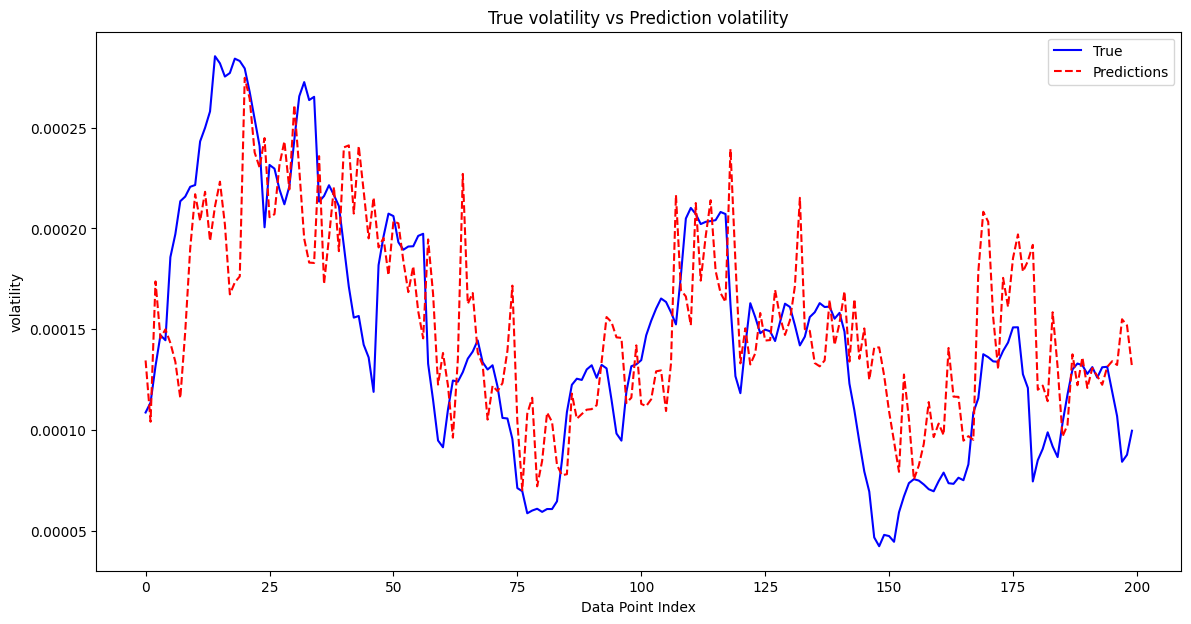

In [23]:
initial_timing = 100
period = 200
plot_range_lgbm(initial_timing,initial_timing + period)

# 아래는 미사용

In [ ]:
# Create a new dataset with only the selected features
# X_selected = X_col[:, top_n_features]

# Now, you can use X_selected for training your model with the selected features
df_selected = pd.concat([X_pca, y_col3], axis=1, ignore_index=False)

In [ ]:
train, test = train_test_split(df_selected, test_size=0.2, shuffle=False)

In [ ]:
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = False)

In [ ]:
# LightGBM 데이터셋으로 변환
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val)

In [ ]:
params = {
    'objective': 'regression',  # 회귀 문제
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'metric': 'l2',             # Mean Squared Error
    'num_leaves': 100,          # 리프 노드의 최대 수 (mean_leaves에 가깝게 설정)
    'min_data_in_leaf': 50,     # 한 리프에 최소한으로 필요한 레코드 수
    'max_depth': 15,            # 최대 깊이 (max_depth에 맞춤)
    'learning_rate': 0.05,      # 학습률
    'feature_fraction': 0.9,    # 트리를 학습할 때마다 선택할 피처의 비율
    'bagging_fraction': 0.8,    # 트리를 학습할 때마다 선택할 데이터의 비율
    'bagging_freq': 5,          # bagging의 빈도
    'n_estimators': 105         # 총 트리의 수 (number_of_trees에 맞춤)
}


In [ ]:
print('Starting training...')
gbm = lgb.train(params,
    lgb_train,
    num_boost_round=500,
    valid_sets=lgb_eval)

#    early_stopping_rounds=50)

# 모델 예측
print('Starting predicting...')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# 모델 평가
print('The RMSPE of prediction is:', rmspe(y_test, y_pred))

In [ ]:
aml_2 = H2OAutoML(seed=1,max_runtime_secs=2400, project_name = 'timeseries_forcasting_v')
aml_2.train(x=list(X_col), y=y_col, training_frame=train)

In [ ]:
lb = aml_2.leaderboard
lb.head(rows=lb.nrows)

In [ ]:
predictions = aml_2.leader.predict(test)
y_true = test[y_col].as_data_frame().values.ravel()
y_pred = predictions.as_data_frame().values.ravel()

# RMSPE 계산
score = rmspe(y_true, y_pred)
print("RMSPE:", score)

In [ ]:
def plot_range(start, end):
  x_range = range(len(y_true[start:end]))

  plt.figure(figsize=(14,7))

  plt.plot(x_range, y_true[start:end], label='True Values', color='blue')
  plt.plot(x_range, y_pred[start:end], label='Predictions', color='red', linestyle='--')

  plt.title('True Values vs Predictions')
  plt.legend()
  plt.xlabel('Data Point Index')
  plt.ylabel('Value')
  plt.show()

In [ ]:
plot_range(0,100)

In [ ]:
model_path = h2o.save_model(model=aml_2.leader, path="/content/drive/MyDrive/트머프", force=True)


LGBM

In [ ]:
df_2 = pd.read_parquet('/content/drive/MyDrive/트머프/my.parquet')
df_2.head()

In [ ]:
with open('/content/drive/MyDrive/트머프/import.pkl', 'rb') as f:
    selected_features = pickle.load(f)

# 512개의 Feature만 사용
selected_features = selected_features[:128].to_list()

In [ ]:
selected_features.append('dv1_realized_volatility')
df_22 = df_2[selected_features]

# numeric_df_2 = df_22.select_dtypes(include=[np.number])
inf_columns = np.isinf(df_22).any()

columns_with_inf = inf_columns[inf_columns].index

for col in columns_with_inf:
    df_22[col] = df_22[col].replace([np.inf, -np.inf], np.nan)

df_22.fillna(df_22.mean(), inplace=True)

In [ ]:
X = df_22.drop('dv1_realized_volatility', axis=1)
y = df_22['dv1_realized_volatility']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = False)

In [ ]:
# LightGBM 데이터셋으로 변환
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val)

In [ ]:
params = {
    'objective': 'regression',  # 회귀 문제
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'metric': 'l2',             # Mean Squared Error
    'num_leaves': 100,          # 리프 노드의 최대 수 (mean_leaves에 가깝게 설정)
    'min_data_in_leaf': 50,     # 한 리프에 최소한으로 필요한 레코드 수
    'max_depth': 15,            # 최대 깊이 (max_depth에 맞춤)
    'learning_rate': 0.05,      # 학습률
    'feature_fraction': 0.9,    # 트리를 학습할 때마다 선택할 피처의 비율
    'bagging_fraction': 0.8,    # 트리를 학습할 때마다 선택할 데이터의 비율
    'bagging_freq': 5,          # bagging의 빈도
    'n_estimators': 105         # 총 트리의 수 (number_of_trees에 맞춤)
}


In [ ]:
print('Starting training...')
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=50
                )

# 모델 예측
print('Starting predicting...')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# 모델 평가
print('The RMSPE of prediction is:', rmspe(y_test, y_pred))

In [ ]:
def plot_range_lgbm(start, end):
  x_range = range(len(y_test[start:end]))

  plt.figure(figsize=(14,7))

  plt.plot(x_range, y_test[start:end], label='True', color='blue')
  plt.plot(x_range, y_pred[start:end], label='Predictions', color='red', linestyle='--')

  plt.title('True volatility vs Prediction volatility')
  plt.legend()
  plt.xlabel('Data Point Index')
  plt.ylabel('volatility')
  plt.show()

In [ ]:
plot_range_lgbm(0,100)

In [ ]:
nfold = 10
folds = KFold(n_splits=nfold, shuffle = False)

# Placeholder for out of fold predictions

# Create a train dataset
train_data = lgb.Dataset(X_train, y_train)

# Cross validation with early stopping and custom feval
cv_results = lgb.cv(params, train_data, num_boost_round=500, folds=folds, early_stopping_rounds=50,
                    stratified=False, return_cvbooster=True)

In [ ]:
# CV 결과에서 booster 모델들을 가져옴
cvbooster = cv_results['cvbooster']

# 예측을 저장할 배열을 생성
nfold = len(cvbooster.boosters)
predictions = np.zeros(len(X_test))

# 각 fold에 대한 모델로 예측을 수행
for i in range(nfold):
    booster = cvbooster.boosters[i]
    predictions += booster.predict(X_test)

# 예측 결과를 평균내어 최종 예측을 얻음
predictions /= nfold
y_pred = predictions

In [ ]:
rmspe(y_test, y_pred)

In [ ]:
plot_range_lgbm(0,100)

In [ ]:
y_pred.std()